-- Epoch 1
Norm: 6.57, NNZs: 15, Bias: -0.674175, T: 349334, Avg. loss: 0.515139
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 9.82, NNZs: 15, Bias: -0.767852, T: 698668, Avg. loss: 0.514145
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 12.31, NNZs: 14, Bias: -0.661617, T: 1048002, Avg. loss: 0.514170
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 14.41, NNZs: 15, Bias: -0.627513, T: 1397336, Avg. loss: 0.513953
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 16.21, NNZs: 12, Bias: -0.697443, T: 1746670, Avg. loss: 0.514109
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 17.85, NNZs: 15, Bias: -0.754628, T: 2096004, Avg. loss: 0.513779
Total training time: 0.72 seconds.
Convergence after 6 epochs took 0.72 seconds



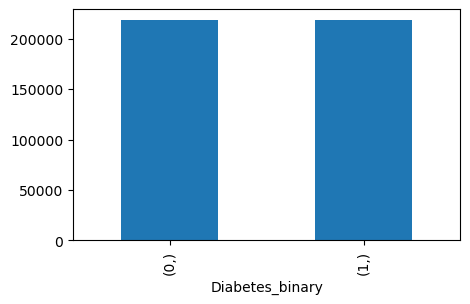

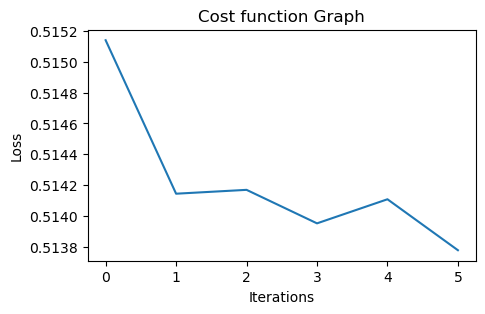

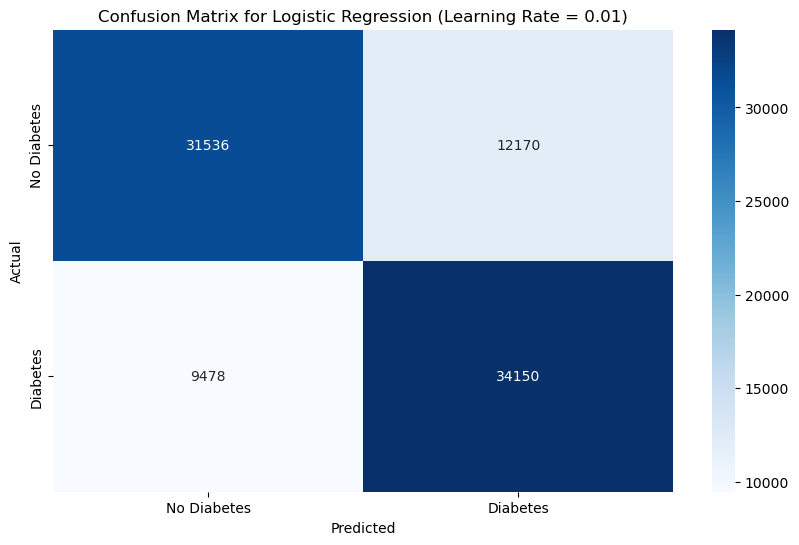

Classification Report for Logistic Regression (Learning Rate = 0.01):
              precision    recall  f1-score   support

           0       0.77      0.72      0.74     43706
           1       0.74      0.78      0.76     43628

    accuracy                           0.75     87334
   macro avg       0.75      0.75      0.75     87334
weighted avg       0.75      0.75      0.75     87334

Specificity:         72.2 

Sensitivity:         78.3 (Recall)


In [3]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import scipy 
from scipy import stats 
from ucimlrepo import fetch_ucirepo 
import sys 
from io import StringIO
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
from imblearn.pipeline import Pipeline

def standardize_data(data):
    data_standardized = data.copy()
    names = data.columns
    for name in names:
        data_standardized[name] = stats.zscore(data[name])
    return data_standardized
    
# Fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

X = standardize_data(X)

#under-over sample
over  = SMOTE(random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)
y.value_counts().plot(kind = 'bar')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_models = []
metrics = {'specificity': [], 'sensitivity': []}

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
logr = SGDClassifier(loss='log_loss',penalty='l1',learning_rate='constant',eta0=0.01,max_iter=1000,random_state=42,verbose=3)
logr.fit(X_train, np.ravel(y_train,order='C'))#y_resampled_smote)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    print(line)
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
        
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('Cost function Graph')
plt.rcParams["figure.figsize"] = (5,3)

y_pred = logr.predict(X_test)
    
# Plot confusion matrix for each learning rate
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix for Logistic Regression (Learning Rate = 0.01)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for each learning rate
print(f'Classification Report for Logistic Regression (Learning Rate = 0.01):\n{classification_report(y_test, y_pred)}')
TN, FP    = cm[0, 0], cm[0, 1]
FN, TP    = cm[1, 0], cm[1, 1]    
TN, FP    = cm[0, 0], cm[0, 1]
FN, TP    = cm[1, 0], cm[1, 1]
print('Specificity:        ',  round(TN / float(TN + FP),3)*100, "\n")
print('Sensitivity:        ',  round(TP / float(TP + FN),3)*100, "(Recall)")